In [26]:
import numpy as np
import pandas as pd
import os

In [27]:
titanic_train = pd.read_csv("C:/Users/semse/Downloads/tested.csv")

In [28]:
titanic_train.shape 

(418, 12)

In [29]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)

titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [31]:
titanic_train["Ticket"][0:15]  

0          330911
1          363272
2          240276
3          315154
4         3101298
5            7538
6          330972
7          248738
8            2657
9       A/4 48871
10         349220
11            694
12          21228
13          24065
14    W.E.P. 5734
Name: Ticket, dtype: object

In [32]:
titanic_train["Ticket"].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [33]:
del titanic_train["Ticket"]

In [34]:
new_Pclass = pd.Categorical(titanic_train["Pclass"],ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

new_Pclass.describe()

,counts,freqs
categories,,
Class1,107,0.255981
Class2,93,0.222488
Class3,218,0.521531


In [35]:
titanic_train["Pclass"] = new_Pclass

In [36]:
titanic_train["Cabin"].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [37]:
char_cabin = titanic_train["Cabin"].astype(str) # Convert data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin .describe()

,counts,freqs
categories,,
A,7,0.016746
B,18,0.043062
C,35,0.083732
D,13,0.031100
E,9,0.021531
F,8,0.019139
G,1,0.002392
n,327,0.782297


In [38]:
titanic_train["Cabin"] = new_Cabin

In [39]:
dummy_vector = pd.Series([1,None,3,None,7,8])

dummy_vector.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [40]:
titanic_train["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [41]:
missing = np.where(titanic_train["Age"].isnull() == True)
missing

(array([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
         84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
        132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
        199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
        256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
        292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
        380, 382, 384, 408, 410, 413, 416, 417], dtype=int64),)

In [42]:
len(missing[0])

86

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

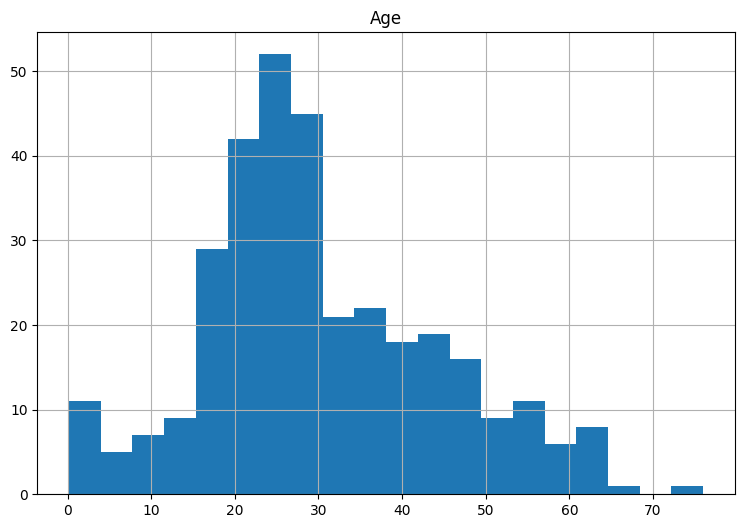

In [43]:
titanic_train.hist(column='Age', figsize=(9,6), bins=20)

In [44]:
new_age_var = np.where(titanic_train["Age"].isnull(), 28, titanic_train["Age"])

titanic_train["Age"] = new_age_var 

titanic_train["Age"].describe()

count    418.000000
mean      29.805024
std       12.667969
min        0.170000
25%       23.000000
50%       28.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

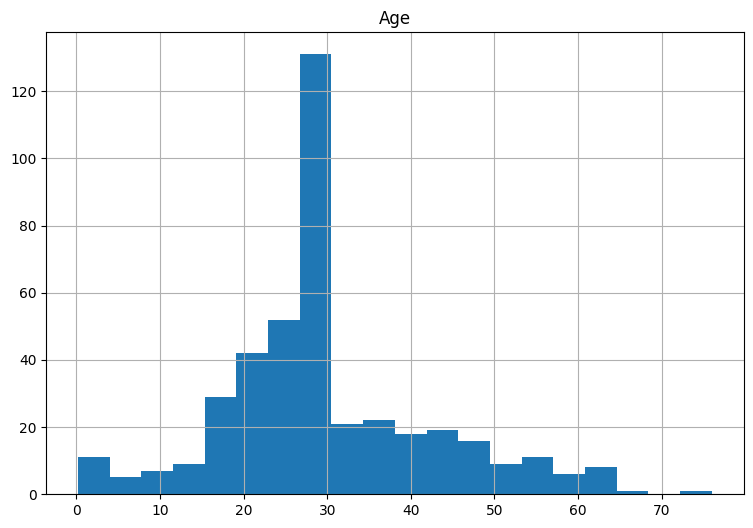

In [45]:
titanic_train.hist(column='Age', figsize=(9,6), bins=20)   